In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

# Вычислительная математика 

## Численное дифференцирование

## Основная задача

1. Дана процедура вычисления значений гладкой функции $f(x)$. Нужно вычислить значение производной в точке $f'(x_0)$.

2. Даны точки $x_1, \ldots, x_n$ и значения гладкой функции в этих точках $f(x_k)$. Найти значения $f'(x_0)$ или $f'(x_k)$.

* Пример: 
$$
f'(x) \approx \hat{f}' = \frac{f(x + h) - f(x)}{h} = \frac{f(x) + f'(x) h + f''(x)h^2/2 + O(h^3) - f(x)}{h} = f'(x) + f''(x) \frac{h}{2} + \mathcal{O}(h^2) = f'(x) + f''(\xi) \frac{h}{2} = f'(x) + \mathcal{O}(h)
$$

В точной арифметике $\lvert f'(x) - \hat{f}' \rvert \le E(h) =  \frac{M_2}{2} h$, $M_2 = \max \lvert f''\rvert$

* В машинной арифметике:
$$
\begin{align}
& \hat{f}' = \frac{f(x+h) (1 + \epsilon_1) - f(x)(1+\epsilon_2)}{h} =  f'(x) + f''(\xi) \frac{h}{2} + \frac{\epsilon_1 f(x+h) -\epsilon_2 f(x)}{h}, \; \lvert \epsilon_k \rvert \le \epsilon \\
& \lvert f'(x) - \hat{f}'\rvert \le \frac{M_2}{2} h + \bigg| \frac{\epsilon_1 f(x+h) -\epsilon_2 f(x)}{h} \bigg| \le \frac{M_2}{2} h + \frac{2 M_0 \epsilon}{h} = E(h)
\end{align}
$$

Точка минимума - оптимальный шаг:
$$
E'(h) = 0 = \frac{M_2}{2} - \frac{2 M_0 \epsilon}{h^2}, \quad h^* = \left(\frac{4 M_0 \epsilon}{M_2}\right)^{1/2} 
$$

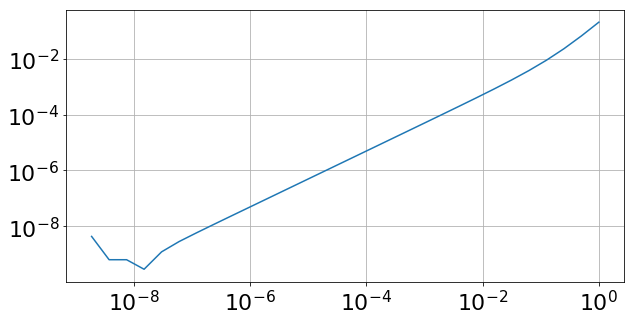

In [3]:
f = lambda x : np.sin(x)
df = lambda x : np.cos(x)
x0 = 0.1
n = 30
h = np.zeros(n)
err = np.zeros(n)
for i in range(n):
    h[i] = 2**(-i)
    df_num = (f(x0 + h[i]) - f(x0)) / h[i]
    err[i] = np.abs(df_num - df(x0))
fig, ax = plt.subplots(figsize = (10,5))
ax.loglog(h,err)
ax.grid(True)

## Повышение порядка, метод неопределенных коэффициентов
* Даны точки $x_1,\ldots, x_n$ и точка $x$, конечная разность имеет вид:
$$
\hat{f}' = \sum_{k=1}^n a_k f(x_k)
$$
Нужно подобрать $a_k$ так, чтобы занулить как можно больше членов в разложении ошибки
$$
f'(x) - \hat{f}' = f'(x) - \sum_{k=1}^{n} a_k \left(f(x) + f'(x) (x_k - x) + \frac{f''(x)}{2} (x_k - x)^2 + \ldots\right)
$$

* Занулим коэффициенты при $f(x)$, $f'(x)$, $f''(x)$: 
$$ 
\begin{align}
& \sum_{k=1}^n a_k = 0 \\
& \sum_{k=1}^n a_k (x_k - x) = 1\\
& \sum_{k=1}^n a_k \frac{(x_k - x)^2}{2!} = 0 \\
\end{align}
$$

## Метод неопределенных коэффициентов

* Получаем линейную систему на коэффициенты:
$$
\begin{align}
\left[\begin{array}{lll}
1 & 1 & \ldots & 1 \\
\frac{(x_1 - x)}{1!} & \frac{(x_2 - x)}{1!} & \ldots & \frac{(x_n - x)}{1!} \\
\ldots & & & \\
\frac{(x_1 - x)^{n-1}}{(n-1)!} & \frac{(x_2 - x)^{n-1}}{(n-1)!} & \ldots & \frac{(x_n - x)^{n-1}}{(n-1)!}
\end{array}\right] 
\left[\begin{array}{c}
a_1 \\
a_2 \\
\vdots \\
a_n
\end{array}\right] = 
\left[\begin{array}{c}
0 \\
1 \\
\vdots \\
0
\end{array}\right]
\end{align}
$$

* Матрица Вандермонда не вырожденная, получаем единственное решение, ошибка имеет вид:
$$
f'(x) - \hat{f}' = -\sum_{k=1}^{n} a_k \frac{f^{(n)}(x)}{n!}(x_k - x)^n + \ldots = -\sum_{k=1}^{n} a_k \frac{f^{(n)}(\xi_k)}{n!}(x_k - x)^n
$$

* При "линейном сжатии" сетки $a_k = O(1/h)$ и ошибка $O(h^{n-1})$, $h = \max(x_k - x)$
* Если узлы расположены симметрично относительно $x$, то ошибка $O(h^n)$ (следующий член зануляется)
* Для производной порядка $d$ по $n$ узлам можно получить порядок $n-d$ ($n -d + 1$ в симметричном случае)

## Дифференцирование интерполяционного многочлена

$$
L_n(x) = \sum_{k=1}^{n} l_j(x) f_j \\
L_n'(x) = \sum_{k=1}^{n} l'_j(x)f_j
$$ 
т.е. $a_k = l_k'(x)$. Можно получить для $a_k$ ту же самую систему (на доске).

## Дифференцирование в матричной (операторной форме)

* Пусть $f = [f_1, \ldots, f_n]$ - значения функции в узлах, $w = [w_1, \ldots, w_n]$ - приближенные значения производных в узлах.

* Численное дифференцирование можно представить как действие линейного оператора на вектор $f$.  
Например, для равномерной сетки, и маленького шаблона:
$$
w = D f, \; D =
\left[\begin{array}{ccccc}
-\frac{1}{h} & \frac{1}{h} & 0 & \ldots & 0 \\
-\frac{1}{2h} & 0 & \frac{1}{2h} & \ldots & 0 \\
& \ddots & \ddots & \ddots &  0 \\
0 & \ldots & & -\frac{1}{h} & \frac{1}{h}
\end{array}\right]
$$

* При использовании формул высокого порядка, матрица получится *плотной*:
$$
D = [l_j'(x_i)]
$$
* Для чебышевских узлов, умножение на матрицу $D$ можно вычислять с помощью FFT за $O(n \log n)$